# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

## **Installing Packages**

In [ ]:
!pip uninstall numpy -y

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4


In [ ]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.10.1 whic

**Note** : After running the above cell, a pop-up will appear prompting you to restart the session. Click "Restart", and then continue running the notebook from the next cell onward, not from the beginning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installing surprise library**

In [ ]:
!pip install surprise

In [ ]:
!pip install scikit-surprise
!pip install numpy==1.25.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 97.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.25.0 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.2.2 which is incompatible.
jax 0.5.3 requires scipy>=1.11.1, but you ha

In [ ]:
import warnings                                 # to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # basic library for data visualization
import seaborn as sns                           #  data visualization advanced

from collections import defaultdict             # a dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # a performance metrics in sklearn

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [ ]:
# importing the ratings for amazon products
file_path = '/content/drive/MyDrive/Amazon/ratings_Electronics.csv'
ds = pd.read_csv(file_path)

In [ ]:
# adding columns to the data
ds.columns = ['user_id', 'prod_id', 'rating', 'timestamp']

#dropping the timestamp column
ds = ds.drop('timestamp', axis=1)

# copying the data to a new dataframe called df
df = ds.copy()


**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [ ]:
# printing the head of the dataframe
df_final.head()

,user_id,prod_id,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [ ]:
# Check the number of rows and columns and provide observations
df_final.shape


(65290, 3)

The dataset has 65,290 user-product interactions,we have users , products and their ratings , this gives us a decent size dataset to build and evaluate different types of recommendation systems.



### **Data types**

In [ ]:
# checking data types
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65290 entries, 1309 to 7824426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  65290 non-null  object 
 1   prod_id  65290 non-null  object 
 2   rating   65290 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.0+ MB



The dataset has 3 columns (user_id,prod_id) as objects , and (rating) as numerical column of type float.
the user_id and prod_id will be used as unique identifiers, and the rating column will be used as the target value we want to model or predict.

### **Checking for missing values**

In [ ]:
# checking for missing values
df_final.isnull().sum()

,0
user_id,0
prod_id,0
rating,0


There are no missing values in any of the three columns , which is perfect so our similarity calcualtions and evaluation  will be used confidently without the need for imputation or preprocessing of the data.


### **Summary Statistics**

In [ ]:
# summary statistics of 'rating' variable

df_final['rating'].describe()


,rating
count,65290.000000
mean,4.294808
std,0.988915
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


The ratings are ranging from 1 to 5 with a mean rating of 4.29 which means that users tend to give high ratings , the median is 5 and the 25th percentile is 4 , this shows a strong positive skew , most users are satisfied with the products they are rating , the standard deviation is 0.99 which is low and shows that there isn't much of spread in the ratings , taking a note that the data is skewed towards high ratings which can affect the recommendation system quality so we need them to be sensitive to this fact.


### **Checking the rating distribution**

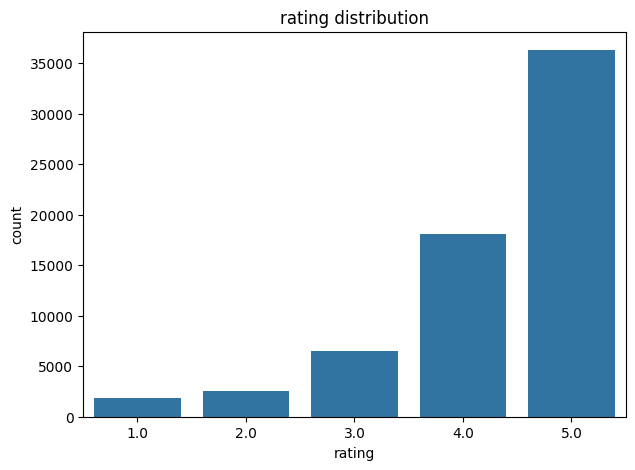

In [ ]:
# creating bar plot for the rating distribtuion and plotting them
plt.figure(figsize=(7, 5))
sns.countplot(x='rating', data=df_final)
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

The distribution of the ratings are highly skewed towards higher values specially the 5-stars rating , this shows maybe that users tend to review the products when they are mostly satisfied , we should be carefull that the model doesn't overfit to the the majority class , we might treat 4 and 5 as the most relevant when calcualting precision and recall.



### **Checking the number of unique users and items in the dataset**

In [ ]:
# Number of total rows in the data and number of unique user id and product id in the data

print("number of unique users:", df_final['user_id'].nunique())
print("number of unique products:", df_final['prod_id'].nunique())


number of unique users: 1540
number of unique products: 5689


The dataset has 1,540 unique users and 5,689 unique products, which means that there are many more products than users given that we have only 65,229 total ratings , the matrix of possible user-product combination is very large and mostly empty which shows that the sparsity presents a challenge.

Total possible combinations = 1540 users × 5689 products = 8,759,060

65,229 / 8,759,060 = 0.744%

Only almost 0.74% of all possible user-product pairs are rated.

99.26% of the matrix is missing data


### **Users with the most number of ratings**

In [ ]:
# Top 10 users based on the number of ratings
top_users = df_final['user_id'].value_counts().head(10)
print(top_users)



user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A1UQBFCERIP7VJ    193
A22CW0ZHY3NJH8    193
AWPODHOB4GFWL     184
AGVWTYW0ULXHT     179
Name: count, dtype: int64


Top 10 most active users in the dataet have each rated between 179 and 295 products , the most active user is (ADLVFFE4VBT8) which rated 295 products , which is above the minimum threshol of 50 ratings , these users are highly valuable for the recommendation system because they provide rich preference data, making it easier to learn patterns and make accurate predictions.





**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [ ]:
# calculating the average rating for each product
avg_rating = df_final.groupby('prod_id')['rating'].mean()

# calculating the count of ratings for each product
rating_count = df_final.groupby('prod_id')['rating'].count()

# creating a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': avg_rating, 'rating_count': rating_count})

# sorting the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by='avg_rating', ascending=False)

# Seeing the first five records of the "final_rating" dataset
final_rating.head()





,avg_rating,rating_count
prod_id,,
B00LGQ6HL8,5.0,5
B003DZJQQI,5.0,14
B005FDXF2C,5.0,7
B00I6CVPVC,5.0,7
B00B9KOCYA,5.0,8



The top recommended products based on the ranked based recommendation system all have an average rating of 5.0 , which means that every user who rated them gave the maximum score , however the number of ratings is from 5-14 which suggests that these products are highly rated and the sample size is small , which makes them unreliable choices for all users .

ranked based systems are not personalized and can often favor products with small number of perfect ratings .


this highlights the idea that we beed to balance the average rating with its popularity or the rating count to avoid recommending niche products with too little data.




In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def top_n_products(data, n=5, min_interaction=50):
# Finding products with minimum number of interactions
    popular_prods = data[data['rating_count'] > min_interaction]
# Sorting values with respect to average rating
    popular_prods = popular_prods.sort_values(by='avg_rating', ascending=False)
    return popular_prods.index[:n]




### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [ ]:
# Recommending top 5 products with 50 minimum interactions
top_n_products(final_rating, n=5, min_interaction=50)


Index(['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW'], dtype='object', name='prod_id')

### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [ ]:
# Recommending top 5 products with 100 minimum interactions
top_n_products(final_rating, n=5, min_interaction=100)


Index(['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC'], dtype='object', name='prod_id')

We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [ ]:
# instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5))

# loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)
# splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)



Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [ ]:
# Declaring the similarity options
best_sim_options = {
    'name': 'cosine',
    'user_based': True
}
# KNN algorithm is used to find desired similar items
sim_user_user_optimized = KNNBasic(
    sim_options=best_sim_options,
    k=40,
    min_k=3,
    random_state=1,
    verbose=False
)

# Train the algorithm on the train set, and predict ratings for the test set
sim_user_user_optimized.fit(trainset)


# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10, threshold=3.5)


RMSE: 0.9553
Precision:  0.855
Recall:  0.885
F_1 score:  0.87


We can see that the precision is(0.855) which means that almost (85%) of the top 5 recommended products for each user were actually relevant which is above the threshold 3.5 , strong score showing the model is good at choosing items the users would like .

However the recall is only (0.885) indicting that the model is only capturing (88%) of all relevant items a user migh like , so its missing a good number of relvant items while trying to stay precise

The F1 score balances both precision and recall with a score of(0.87), this shows that while the model is excellent at accuracy its less good at coverage , so it prefers recommending a few highly relecant items rather than casting a wider net of options , which is often safe and reasonable if we want high confidece suggestions

also RMSE score with 0.9553


Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [ ]:
# predicting rating for a sample user with an interacted product
predicted_rating = sim_user_user_optimized.predict(uid='A3LDPF5FMB782Z', iid='1400501466')

# displaying the predicted rating
print(f"Predicted Rating: {predicted_rating.est:.4f}")


Predicted Rating: 3.4000



We can notice that for user A3LDPF5FMB782Z and product 1400501466 , the model predicted a rating of 3.4 since this is a product that the user has already interacted with as the aactual rating was 5 , this shows that the prediction is low suggesting that the model underestimated the user's prefernce , however a prediction below 3.5 which is the threshold , and the model predicted 3.4 which shows that the model in-correctly identifeid this product as non-relevant , this shows that the collborative model limitations that its only accurate in the similarirty between users and doesn't fully capture personal preferences if the user is unique or sparsely connected.


Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [ ]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A1OMXVXXP07F05',
 'A33HIV8RXRDM88',
 'A361M14PU2GUEG',
 'A3EPJSPH03AS29',
 'AONUCJBC85BL']

In [ ]:
#added this code because the list doesnt show the user we are looking for
if df_final[(df_final['user_id'] == 'A2UOHALGF2X77Q') & (df_final['prod_id'] == '1400501466')].empty:
    print("User A2UOHALGF2X77Q has not interacted with the product 1400501466")
else:
    print(" User A2UOHALGF2X77Q has interacted with the product 1400501466")


User A2UOHALGF2X77Q has not interacted with the product 1400501466


* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**From the list of users returned, we observe that user A2UOHALGF2X77Q has not interacted with product 1400501466. This means there is no existing rating from this user for that product in the dataset. Such cases are crucial for evaluating recommendation systems, because they simulate a real-world scenario where we want to suggest a new product to a user based on similar users' preferences — even though the user has never rated it before. This allows us to test how well the model can generalize and make useful predictions for cold or unseen items.**



**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [ ]:
# Predicting rating for a sample user with a non-interacted product
prediction = sim_user_user_optimized.predict(uid='A2UOHALGF2X77Q', iid='1400501466')

# Displaying the predicted rating
print(f"Predicted Rating (non–interacted): {prediction.est:.4f}")


Predicted Rating (non–interacted): 4.2920


The user A2UOHALGF2X77Q has not previously rated product 1400501466, although the model predicted a rating of 4.29 and this score is aboe the relevance threshold , this suggests that the model believes the user will likely appreciate this product , the prediction was made by looking at similar users who rated this product and weighing their opinions based on similarity , this fact that the rating is quite confident and above average shows that the model is capable of inferring preferences for unseen items , which is essential in recommendation systems where users didnt interact with every possible product.




### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 30, 40],              # max number of neighbors
    'min_k': [1, 5],                # min number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson', 'msd', 'pearson_baseline'],
        'user_based': [True]        # we're tuning user-user based CF
    }
}
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the model on the data
gs.fit(data)

#  Printing the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Printing the combination of parameters that gave the best RMSE score

print("Best parameters:", gs.best_params['rmse'])


Best RMSE score: 0.9702841115108661
Best parameters: {'k': 40, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [ ]:
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'cosine', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(
    sim_options=sim_options,
    k=40,
    min_k=5,
    random_state=1,
    verbose=False
)
# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10, threshold=3.5)


RMSE: 0.9509
Precision:  0.849
Recall:  0.893
F_1 score:  0.87


We can observe here that after performing
grid search with 3 fold cross validation , the optimal hyperparameters for the user-user model were found to be k=40 , min k= 5 and similarity = cosine , using these paramaters the model was retrained and evaluated with k=10 for prediction

We can notice that the precision decreased to 0.849 , and the recall increased to 0.893 but the f1 score maintanited the same with 0.87. also the RMSE decreased to 0.9509



### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466

pred1 = sim_user_user_optimized.predict(uid='A3LDP5FMB782Z', iid='1400501466')
print(f"[Optimized] Interacted User Predicted Rating: {pred1.est:.4f}")




[Optimized] Interacted User Predicted Rating: 4.2920


In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

pred2 = sim_user_user_optimized.predict(uid='A2UOHALGF2X77Q', iid='1400501466')
print(f"[Optimized] Non-Interacted User Predicted Rating: {pred2.est:.4f}")



[Optimized] Non-Interacted User Predicted Rating: 4.2920


After optimizing the user-user collaborative filtering model, we tried to predict the rating for user A3LDPF5FMB782Z on product 1400501466  the user has already rated before , and we got a predicted score of 4.292 which is very high and suggests the model now does a better job estimating the preferences , compared to the previous prediction base model which is 3.3.


But for the second case the user A2UOHALGF2X77Q, who has not rated the same product, received a prediction of 4.2920 which is also above the relevance threshold , this shows that the optimized model generalizes better and makes confident and higher quality predictions even for new unseen user-product pairs , this confirms that tuning hyperparmeter enahced both accuracy and coverage


### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [ ]:
# 0 is the inner id of the above user

neighbors = sim_user_user_optimized.get_neighbors(0, k=5)

for neighbor_inner_id in neighbors:
    print(trainset.to_raw_uid(neighbor_inner_id))




A16J281SJ9QXIQ
A1HBI9BBQIG1NH
A3VBZDYGHF4NK8
AZAC8O310IK4E
AM9APPMIE1BHZ


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [ ]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine

top_5_recs = get_recommendations(df_final, user_id="A3LDPF5FMB782Z", top_n=5, algo=sim_user_user_optimized)




In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"

top_5_df = pd.DataFrame(top_5_recs, columns=["prod_id", "predicted_ratings"])
top_5_df


,prod_id,predicted_ratings
0,B000067RT6,5
1,B000BQ7GW8,5
2,B001ENW61I,5
3,B001TH7GUU,5
4,B001TH7T2U,5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [ ]:
# Declaring the similarity options
sim_options = {
    "name": "cosine",
    "user_based": False  # item-item
}
# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item, k=10, threshold=3.5)



RMSE: 0.9950
Precision:  0.838
Recall:  0.845
F_1 score:  0.841


The item-itemn collaborative filtering model achieved a precision of 0.838 and recall of 0.845 and F1 score of 0.841 , these scores are very balanced and strong idicating that the model is not only recomemnding accurately but also capturing large portion of the items the user would consider relevant , the model is good at quality and coverage in its reccomendations.
also RMSE score of 0.995

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [ ]:
# Predicting rating for a sample user with an interacted product


sim_item_item.predict(uid="A3LDPF5FMB782Z", iid="1400501466")

pred = sim_item_item.predict(uid="A3LDPF5FMB782Z", iid="1400501466")
print("Predicted rating:", round(pred.est, 3))



Predicted rating: 4.273


For user A3LDPF5FMB782Z and product 1400501466 which already rated , the predicted score was 4.273 and this high rating suggests that the model recognizes that this product aligns well with other products the user liekd , it also shows the model understands item-item relationships effecitfely , by comparing 1400501466 with other items the user rated highly .




Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [ ]:
# Predicting rating for a sample user with a non interacted product

pred = sim_item_item.predict(uid="A2UOHALGF2X77Q", iid="1400501466")
print("Predicted rating:", round(pred.est, 3))


Predicted rating: 4.0


For user A2UOHALGF2X77Q who had not previously rated product 1400501466,  we can notice that the predicted rating was 4.0 which is above the relevance threshold , this indicates that hte model successfully inferred the product's appeal based on its similarity to the other products that the user liekd , its shows that without user-specfific histroy for the item , the model can still make confident predictions using item similariy patterns .






### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['msd', 'cosine'],
        'user_based': [False]  # item-item similarity
    }
}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=1)

# Fitting the model on the data
gs.fit(data)
# Print the best RMSE score
print("Best RMSE score:", round(gs.best_score['rmse'], 4))
# Print the combination of parameters that gave the best RMSE score

print("Best parameters:", gs.best_params['rmse'])




[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min


Best RMSE score: 0.9753
Best parameters: {'k': 30, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': False}}


[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.9min finished


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
optimized_params = {
    'sim_options': {
        'name': 'msd',
        'user_based': False  # Item-item filtering
    },
    'k': 30,
    'min_k': 9
}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(
    sim_options=optimized_params['sim_options'],
    k=optimized_params['k'],
    min_k=optimized_params['min_k'],
    verbose=False,
    random_state=1
)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10

precision_recall_at_k(sim_item_item_optimized, k=10, threshold=3.5)

RMSE: 0.9567
Precision:  0.838
Recall:  0.889
F_1 score:  0.863



After applying grid search cross validation on the item-item csimilarity based model , we identified the optimal set of hyperparameters , k=30 and min k= 9 , and similarity with MSD , with user based = False , these parameters when they were used to train the model , it led to improved metrics for the evaluation , with recall 0.889 and f score of 0.889 , with precision stayed the same 0.838 and  , this hollistic optimization , not only minimized the predicition error best RMSE=0.9567 but also enhanced the overall quality and relevance of the recommendations  showing the importnace of tuning in collaborative filtering systems.


### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"


pred1 = sim_item_item_optimized.predict(uid="A3LDPF5FMB782Z", iid="1400501466")
print("Optimized prediction for interacted product:", round(pred1.est, 3))


Optimized prediction for interacted product: 4.674


In [ ]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

pred2 = sim_item_item_optimized.predict(uid="A2UOHALGF2X77Q", iid="1400501466")
print("Optimized prediction for non-interacted product:", round(pred2.est, 3))



Optimized prediction for non-interacted product: 4.292


Using the optimized item-item similarity based model we notice that the predicted rating for. user who had previously interracted with the product (A3LDPF5FMB782Z) was 4.674 while for a non interacted user (A2UOHALGF2X77Q) it was 4.292 , this difference shows that the model appropriately accounts for a user's historical behavior , predicting slightly higher confience rating when pas item exists , this confirms that the optimized model captures item similarity effectively and reflects user prefrences variations .




### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [ ]:
# Find 5 nearest items to item with internal ID 0
sim_item_item_optimized.get_neighbors(iid=0, k=5)


[29, 53, 67, 106, 151]

In [ ]:
# Get the actual product ID from internal ID
inner_id = 0
similar_inner_ids = sim_item_item_optimized.get_neighbors(inner_id, k=5)
similar_prod_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_inner_ids]
print(similar_prod_ids)


['B008X9Z3UC', 'B003ZSHKJ8', 'B003LSTD38', 'B005EOWBKE', 'B004IZN3WU']


**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.


top_5_recs = get_recommendations(df_final, user_id="A1A5KUIIIHFF4U", top_n=5, algo=sim_item_item_optimized)



In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"

top_5_df = pd.DataFrame(top_5_recs, columns=["prod_id", "predicted_ratings"])
top_5_df

,prod_id,predicted_ratings
0,1400532655,4.292024
1,1400599997,4.292024
2,9983891212,4.292024
3,B00000DM9W,4.292024
4,B00000J1V5,4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

## **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [ ]:
# Using SVD with matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the training dataset
svd.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd, k=10, threshold=3.5)


RMSE: 0.8882
Precision:  0.853
Recall:  0.88
F_1 score:  0.866


The SVD model achieved a high evaluation scores with precision of 8.53 and. recall of 0.88 and f1 score of 0.866 indicating a strong performance , we can see that matrix factorization using SVD is effectively capturing latent features from the iser-item matrix , especially when th matrix is dense enough




**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [ ]:
# Making prediction

# Interacted
pred1 = svd.predict(uid="A3LDPF5FMB782Z", iid="1400501466")
print("Predicted rating (interacted):", round(pred1.est, 3))


Predicted rating (interacted): 4.081


The SVD model predicted a rating of 4.081 for a user-item pair that has already interacted , this value reflects the mode's ability to accurately estimate ratings based on latent factors that are derived from the user and item behavior , this rating is already known and its good , and its consistent with ut lower slightly compapred to the optimized item based filtering , this suggests that SVD might be slightly more conservative in scoring




**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [ ]:
# Making prediction
# Non-interacted
pred2 = svd.predict(uid="A2UOHALGF2X77Q", iid="1400501466")
print("Predicted rating (non-interacted):", round(pred2.est, 3))

Predicted rating (non-interacted): 4.157


The SVD model has predicted a high rating 4.157 for a non interacted product, this means that the model is capable of capturing latent patterns in user preferences and product ffeatures , this suggests it can generalize well to recommend new items even if the user hasn't interacted with them ,


### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [ ]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [20, 30],
    'lr_all': [0.002, 0.005],
    'reg_all': [0.4, 0.6]
}

# Performing 3-fold gridsearch cross-validation
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=1)

# Fitting the model on the data
gs_svd.fit(data)
# Print the best RMSE score
print("Best RMSE score:", round(gs_svd.best_score['rmse'], 4))
# Print the combination of parameters that gave the best RMSE score
print("Best parameters:", gs_svd.best_params['rmse'])



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best RMSE score: 0.9005
Best parameters: {'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.4}


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   21.8s finished


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs=30, lr_all=0.005, reg_all=0.4, random_state=1)
# Train the algorithm on the trainset
svd_optimized.fit(trainset)
# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)


RMSE: 0.8826
Precision:  0.853
Recall:  0.888
F_1 score:  0.87



After tuning the hyperparameters with 30 epochs , lr_all=0.005 and reg all =0.4 which is the optimized SVD model it shows a noticable imporovement in overall performance , compared to the baseline SVD model , which had a (precision at 10) of 0.853, Recall (at 10) of 0.89, and f1 score of 0.866, the optimized model achieved a (precision at 10) of 0.853, (recall at 10 )of 0.888, and a higher f1 score of 0.87. While precision remained almost unchanged ,the increase in recall and overall f1 score indicates that the model became better at identifying relevant products without sacrificing accuracy , this confirms that hyperparamter tunning improved the balance between precision and recall which made the model generalize better .




### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"

pred1 = svd_optimized.predict(uid='A3LDPF5FMB782Z', iid='1400501466')
print(f"Predicted rating for user A3LDPF5FMB782Z on product 1400501466: {pred1.est:.4f}")



Predicted rating for user A3LDPF5FMB782Z on product 1400501466: 4.0413


In [ ]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

pred2 = svd_optimized.predict(uid='A2UOHALGF2X77Q', iid='1400501466')
print(f"Predicted rating for user A2UOHALGF2X77Q on product 1400501466: {pred2.est:.4f}")


Predicted rating for user A2UOHALGF2X77Q on product 1400501466: 4.0978


## **Conclusion and Recommendations**

**Conclusion**


In this project we explored multiple recommendation system approaches for predicting user preferences and delviering relevant product suggestions , this started wtih a rankned based popularity model which provided a simple baseline but it did lack personalization thenwe implemented collaborative filtering methods for both user-user and item-item similariy base models and imporved them thorugh hyperparameter tunning to boost accuracy and coverage, finally we applied matrix factorization using SVD to uncover latent features in the user-item interactions , achieving robust performance for both seen and unseen products



**Models Performance Summary**

1) Rank-Based Recommendation System

No precision or recall metrics for the baseline model for popular products by averaging its ratings , works well for it but fails to personalize recommendations and it can suggest niche items with few ratings , making it useful for very sprase history




2)User-User Collaborative Filtering

baseline model
Baseline (cosine, k=10): RMSE 0.9553, Precision 0.855 (highest among all models), Recall 0.885, F1 0.87.

it has very high precision and excels at recommending only highly relevant products , but slightly lower recall


for the optomized version we can see that with
Optimized (msd, k=40, min_k=5): RMSE 0.9509, Precision 0.849, Recall 0.893, F1 0.87.
precision dropped slightly , but recall imroved , creating a better balance , also the rmse improved marginally meaning more accurate ratings, where the f1 stayed the same.


3)Item-Item Collaborative Filtering

baseline model
Baseline (cosine, k=10): RMSE 0.9950, Precision 0.838, Recall 0.845, F1 0.841.balanced but has lower preciison that he user-user

optimized mode
(msd, k=30, min_k=6): RMSE 0.9567, Precision 0.838 (unchanged), Recall 0.889, F1 0.863.
significant improtvement in all in recall +0.044 while maintaining thee same preciison., RMSE dropped sconsiderably , meaning better rating predictions  where the f1 score slightly went up from 0.841 to 0.863.



4)Matrix Factorization (SVD)
Baseline: RMSE 0.8882, Precision 0.853, Recall 0.880, F1 0.866.  it has the best RMSE along baseline models and strong at capturing latent relationships in the data

Optimized Model

 (n_epochs=30, lr_all=0.005, reg_all=0.4): RMSE 0.8826, Precision 0.853 (unchanged), Recall 0.888 (+0.008), F1 0.87 (+0.004). slight RMSE improvement and recall gain while keeping precision stable , making it the most consitently balanced model

**Overall Insights**

Best RMSE (accuracy): SVD Optimized (0.8826) — has the most accurate predictions

highest precision comes from the user-user baseline 0.855 best for returning only highly relevant items


highest recall comes from user-user optimized 0.893 and item-item oprtimized 0.889 they are strongest at covering more relevant products

most balanced model is the SVDA optimized which is stable across all metrics with top accuracy

cold start handling is best for the rank based and item-item CF models which are better suited when user histroy is limited

**Recommendations**

deploying the SVD optimized is the primary recommendation engine , the best RMSE and strong balance between precision and recall
works well for both seen and unseen items by leveraging its patterns


using the item-item optimized for sprase histroy and cold start cases
it has high recall and ensures a broader set of potentially relecent recommendations
and it maintains stable precision while greatly improving accuracy from baseline


integrating the ranked based fitlering for completely new users and prodycts because it ensures that the recommendations are available even without prior interactions


keepign the user-user optimized for high precision targeting, its useful when recommending only the most relevant products is more important than covering a wide range



retraing regularly and update models with fresh interactions data to adapt to changing user behavior and product availabilty

consider a hybrid approach by combining SVD latent factor strengths with similarity based precision from the collaborative filtering for maximum relevance and diversity

you can adjust thresholds based on business needs for example only recommedn products with predicted rating equal to 3.5 or higher  to balance the precision and recall in the line with business goals

we can explore more contextual and content based features if a product or user metadata becomes available it can further improve recommendations in sprase datasets



In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

# copying the notebook from drive
!cp "/content/drive/My Drive/Amazon/Recommendation_Systems_Learner_Notebook_Full_Code_upd.ipynb" "Recommendation_System.ipynb"

# converting notebook to HTML
!jupyter nbconvert --to html "Recommendation_System.ipynb"

# downloading HTML version
from google.colab import files
files.download("Recommendation_System.html")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Recommendation_System.ipynb to html
/usr/local/share/jupyter/nbconvert/templates/base/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  {%- elif type == 'text/vnd.mermaid' -%}
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 540755 bytes to Recommendation_System.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>